# POSTTEST 6

## Import Library 

In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## Menampilkan data dalam dataset

In [60]:
df = pd.read_csv("Snapchat_app_store_reviews.csv")
df

,Unnamed: 0,userName,rating,review,isEdited,date,title
0,0,Savvanananahhh,4,For the most part I quite enjoy Snapchat it’s ...,False,10/4/20 6:01,Performance issues
1,1,Idek 9-101112,3,"I’m sorry to say it, but something is definite...",False,10/14/20 2:13,What happened?
2,2,William Quintana,3,Snapchat update ruined my story organization! ...,False,7/31/20 19:54,STORY ORGANIZATION RUINED!
3,3,an gonna be unkown😏,5,I really love the app for how long i have been...,False,4/22/21 14:10,The app is great
4,4,gzhangziqi,1,This is super frustrating. I was in the middle...,False,10/2/20 13:58,"Locked me out, customer service not helping"
...,...,...,...,...,...,...,...
9555,9555,geekygirl17,1,I used to love using Snapchat and now I hardly...,False,6/24/19 0:58,Major issue...not that it will get fixed
9556,9556,changemaker kkdd,2,"Well, I did deleted it because there was some ...",False,6/23/19 13:42,I got then deleted it.
9557,9557,teekay2much,4,Every time I upload a photo or video to my sto...,False,6/3/19 3:35,Story problem
9558,9558,whoratheexplora,4,"Love this app, but since he update I can’t upl...",False,6/3/19 3:26,Bugs


## Preprocessing dataset

#### Encoding Target

In [65]:
le = LabelEncoder()
df['y'] = le.fit_transform(df['rating'])

In [66]:
# Pilih atribut yang dianggap memengaruhi hasil prediksi
selected_features = ['Unnamed: 0', 'userName', 'rating', 'review', 'isEdited', 'date', 'title']
X = df[selected_features]
y = df['rating']

#### One-hot encoding untuk atribut kategori

In [67]:
X = pd.get_dummies(X, columns=['userName', 'review', 'isEdited', 'date', 'title'], drop_first=True)

#### Normalisasi atribut numerik

In [68]:
scaler = StandardScaler()
X[['Unnamed: 0', 'rating']] = scaler.fit_transform(X[['Unnamed: 0', 'rating']])


## Split dataset menjadi train dan test

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Membangun model Dengan Sequential

#### Output Layer Target Adalah Kategorikal Menggunakan biner

In [70]:
model = Sequential()
model.add(layers.Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                2300160   
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2302273 (8.78 MB)
Trainable params: 2302273 (8.78 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Callback

#### Callback untuk menghentikan pelatihan jika tidak ada perbaikan pada validation loss

In [71]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

#### Callback untuk menyimpan model terbaik berdasarkan validation loss

In [76]:
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

## Compile model

In [79]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Melatih Model

In [80]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, callbacks=[early_stopping, model_checkpoint])

Epoch 1/100
96/96 [==============================] - 8s 74ms/step - loss: -3.8002 - accuracy: 0.1965 - val_loss: -14.8941 - val_accuracy: 0.1961
Epoch 2/100


D:\venv_C1-21\Andre_121\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


96/96 [==============================] - 6s 59ms/step - loss: -63.0463 - accuracy: 0.1992 - val_loss: -137.2358 - val_accuracy: 0.1961
Epoch 3/100
96/96 [==============================] - 5s 53ms/step - loss: -327.4929 - accuracy: 0.1992 - val_loss: -528.1934 - val_accuracy: 0.1961
Epoch 4/100
96/96 [==============================] - 5s 52ms/step - loss: -986.0994 - accuracy: 0.1992 - val_loss: -1340.3080 - val_accuracy: 0.1961
Epoch 5/100
96/96 [==============================] - 5s 51ms/step - loss: -2211.2673 - accuracy: 0.1992 - val_loss: -2712.5718 - val_accuracy: 0.1961
Epoch 6/100
96/96 [==============================] - 5s 52ms/step - loss: -4144.2700 - accuracy: 0.1992 - val_loss: -4749.2217 - val_accuracy: 0.1961
Epoch 7/100
96/96 [==============================] - 5s 52ms/step - loss: -6929.5469 - accuracy: 0.1992 - val_loss: -7562.4824 - val_accuracy: 0.1961
Epoch 8/100
96/96 [==============================] - 5s 52ms/step - loss: -10680.4336 - accuracy: 0.1992 - val_loss: -

In [81]:
# Load model terbaik
model = keras.models.load_model('best_model.h5')

## Evaluasi Model

In [82]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

60/60 [==============================] - 1s 8ms/step - loss: -8183388.5000 - accuracy: 0.1883
Test Loss: -8183388.5000
Test Accuracy: 0.1883


## grafik perbandingan accuracy dan loss dari train dan test

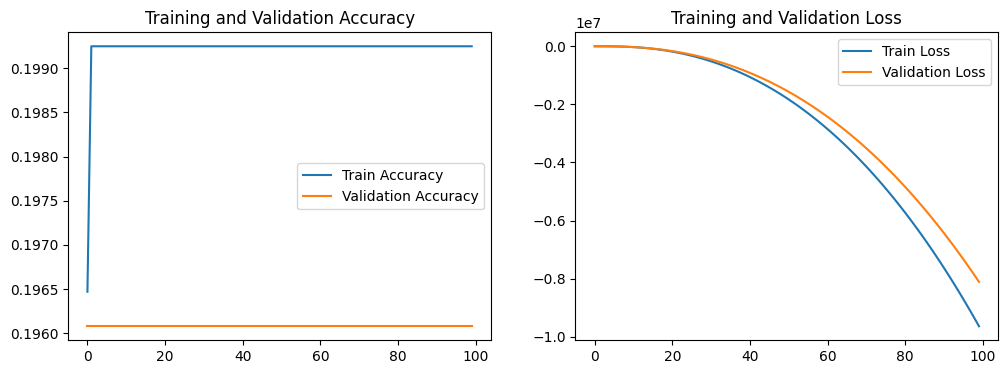

In [83]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()